In [1]:
import numpy as np
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas_datareader as web

In [3]:
verizon_data = quandl.get("EOD/VZ", authtoken = "9-XyWsmUoUnYZw2yS7UB")

In [4]:
microsoft_data = quandl.get("EOD/MSFT", authtoken = "9-XyWsmUoUnYZw2yS7UB")

In [5]:
disney_data = quandl.get("EOD/DIS", authtoken = "9-XyWsmUoUnYZw2yS7UB")

In [6]:
verizon_data.tail()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2018-04-30,51.40,51.650,49.340,49.35,28938194.0,0.0,1.0,51.40,51.650,49.340,49.35,28938194.0
2018-05-01,49.49,49.650,48.240,48.82,16101365.0,0.0,1.0,49.49,49.650,48.240,48.82,16101365.0
2018-05-02,48.79,48.860,47.485,47.75,18515467.0,0.0,1.0,48.79,48.860,47.485,47.75,18515467.0
2018-05-03,47.72,47.855,47.360,47.84,16113050.0,0.0,1.0,47.72,47.855,47.360,47.84,16113050.0
2018-05-04,47.50,48.320,47.490,48.19,10667814.0,0.0,1.0,47.50,48.320,47.490,48.19,10667814.0


In [7]:
microsoft_data.tail()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2018-04-30,96.33,96.3964,93.15,93.52,41523605.0,0.0,1.0,96.33,96.3964,93.15,93.52,41523605.0
2018-05-01,93.21,95.2900,92.79,95.00,31408927.0,0.0,1.0,93.21,95.2900,92.79,95.00,31408927.0
2018-05-02,94.99,95.1700,93.19,93.51,27471002.0,0.0,1.0,94.99,95.1700,93.19,93.51,27471002.0
2018-05-03,92.96,94.9250,92.45,94.07,31142497.0,0.0,1.0,92.96,94.9250,92.45,94.07,31142497.0
2018-05-04,93.32,95.3700,92.92,95.16,22531325.0,0.0,1.0,93.32,95.3700,92.92,95.16,22531325.0


In [8]:
disney_data.tail()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2018-04-30,100.41,101.3736,100.12,100.33,8557844.0,0.0,1.0,100.41,101.3736,100.12,100.33,8557844.0
2018-05-01,100.18,100.7000,98.93,100.06,6715237.0,0.0,1.0,100.18,100.7000,98.93,100.06,6715237.0
2018-05-02,100.17,100.7213,99.25,99.62,9285764.0,0.0,1.0,100.17,100.7213,99.25,99.62,9285764.0
2018-05-03,99.11,99.2500,97.68,98.76,10448936.0,0.0,1.0,99.11,99.2500,97.68,98.76,10448936.0
2018-05-04,98.71,101.3500,98.58,101.15,9978020.0,0.0,1.0,98.71,101.3500,98.58,101.15,9978020.0


let's plot the pattern of the opening prices for all three companies, but I want them to be in the same graph


In [9]:
import pylab as pl

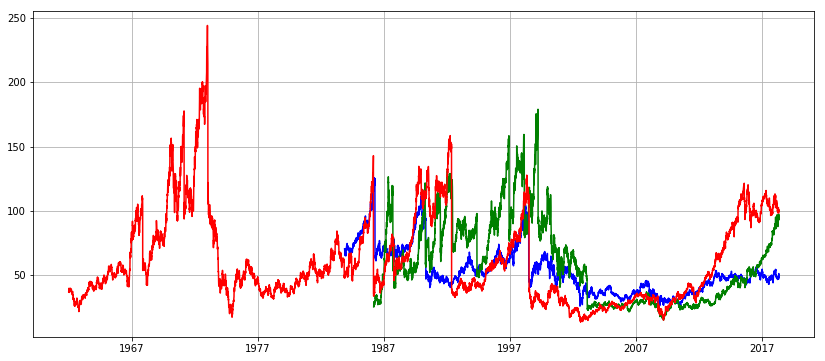

In [17]:
pl.figure(figsize=(14,6))

pl.plot(verizon_data["Open"], "b")
pl.plot(microsoft_data["Open"], "g")
pl.plot(disney_data["Open"], "r")

plt.grid(True)

pl.show()

now on to the distribution of the opening prices for our three companies

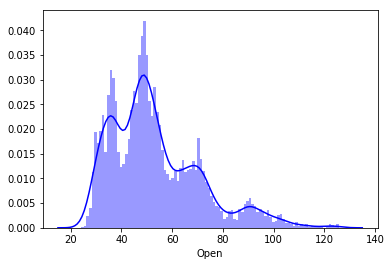

In [19]:
sns.distplot(verizon_data['Open'],bins=100,color="blue")


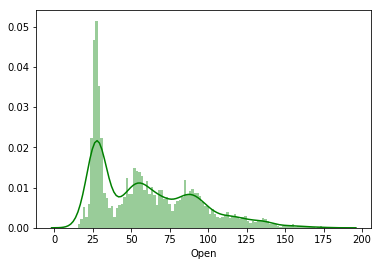

In [20]:
sns.distplot(microsoft_data['Open'],bins=100,color="green")


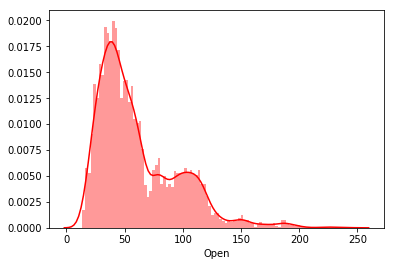

In [21]:
sns.distplot(disney_data['Open'],bins=100,color="red")

distibution of change in opening prices

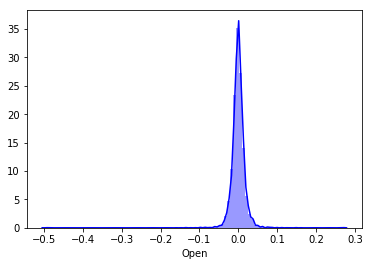

In [22]:
sns.distplot(verizon_data['Open'].pct_change().dropna(),bins=100,color="blue")

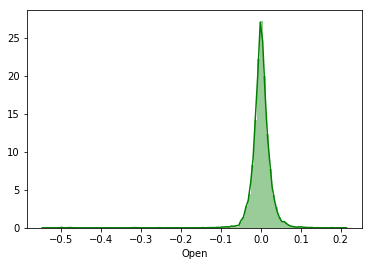

In [23]:
sns.distplot(microsoft_data['Open'].pct_change().dropna(),bins=100,color="green")

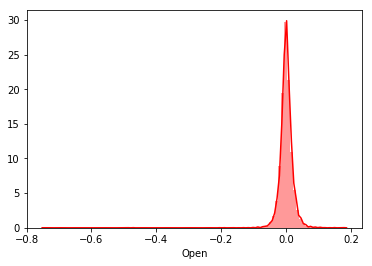

In [24]:
sns.distplot(disney_data['Open'].pct_change().dropna(),bins=100,color="red")

as we can see, the changes in opening prices for all the companies follow a normal distribution pattern, with a mean being very close to 0. This, as mentioned in the classroom and one of our reading assignments, is a normal pattern for stock prices. 

In [33]:
def stock_simulator(starting_price,periods,mean,std):
    X_axis = []
    Y_axis = []
    
    current_period = 1
    previous_price = starting_price
    
    while current_period <= periods:
        
        drift = float(mean)/periods
        shock = np.random.normal(loc=drift,scale=float(std)/np.sqrt(periods))
        
        current_price = previous_price + previous_price*(drift + shock)
        previous_price = current_price
        
        X_axis.append(current_period)
        Y_axis.append(current_price)
        
        current_period = current_period + 1
    
    plt.subplot(121)
    plt.plot(X_axis,Y_axis)
    return Y_axis[-1]

# Verizon VaR

In [34]:
starting_price = verizon_data["Open"][-1]
periods = 365
mean = verizon_data["Open"].pct_change().dropna().mean()
std = verizon_data["Open"].pct_change().dropna().std()

C:\Users\sweet\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


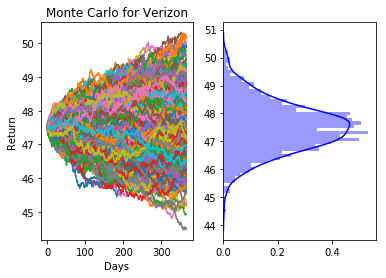

In [35]:
simulations=0
outcomes = []
while simulations < 1000:
    outcomes.append(stock_simulator(starting_price,periods,mean,std))
    simulations += 1
    
plt.ylabel('Return')
plt.xlabel('Days')
plt.title("Monte Carlo for Verizon")
plt.subplot(122)
sns.distplot(outcomes,bins=50,color="blue",vertical=True)

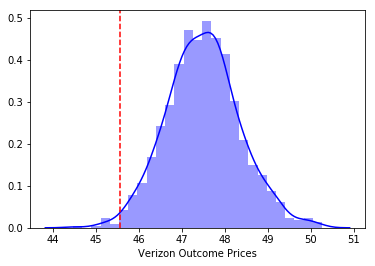

In [37]:
q = np.percentile(outcomes,1) 
sns.distplot(outcomes,color="blue",vertical=False,axlabel='Verizon Outcome Prices')
plt.axvline(q, color="red", linestyle="--")

with 99% confidence we can say that the worst price we can witness is a bit more than 45$

In [38]:
VaR_coef_verizon = (starting_price - q)/starting_price
investment = 1000
VaR_verizon = VaR_coef_verizon*investment
print(VaR_verizon)

40.72707583791421


in worst case scenario, if I invest in Verizon's stock, I may end up losing 40.7$.

# Microsoft VaR

In [39]:
starting_price = microsoft_data["Open"][-1]
periods = 365
mean = microsoft_data["Open"].pct_change().dropna().mean()
std = microsoft_data["Open"].pct_change().dropna().std()

C:\Users\sweet\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


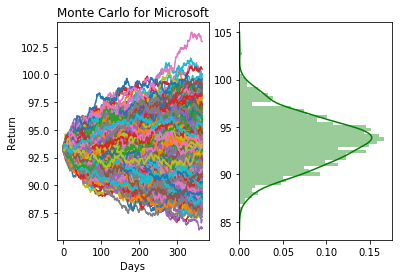

In [40]:
simulations=0
outcomes = []
while simulations < 1000:
    outcomes.append(stock_simulator(starting_price,periods,mean,std))
    simulations += 1
    
plt.ylabel('Return')
plt.xlabel('Days')
plt.title("Monte Carlo for Microsoft")
plt.subplot(122)
sns.distplot(outcomes,bins=50,color="green",vertical=True)

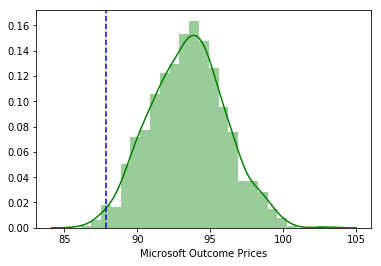

In [41]:
q = np.percentile(outcomes,1) 
sns.distplot(outcomes,color="green",vertical=False,axlabel='Microsoft Outcome Prices')
plt.axvline(q, color="blue", linestyle="--")

with 99% confidence, we can say that the future worst price we may witness in Microsoft's case is around 87$

In [42]:
VaR_coef_microsoft = (starting_price - q)/starting_price
investment = 1000
VaR_microsoft = VaR_coef_microsoft*investment
print(VaR_microsoft)

58.669512347675884


If I invest 1000 dollars in Microsoft's stock, in the worst case scenario I may end up losing 58$

# Disney VaR

In [45]:
starting_price = disney_data["Open"][-1]
periods = 365
mean = disney_data["Open"].pct_change().dropna().mean()
std = disney_data["Open"].pct_change().dropna().std()

C:\Users\sweet\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


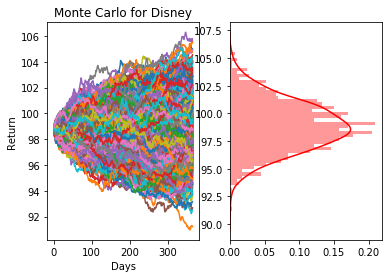

In [46]:
simulations=0
outcomes = []
while simulations < 1000:
    outcomes.append(stock_simulator(starting_price,periods,mean,std))
    simulations += 1
    
plt.ylabel('Return')
plt.xlabel('Days')
plt.title("Monte Carlo for Disney")
plt.subplot(122)
sns.distplot(outcomes,bins=50,color="red",vertical=True)

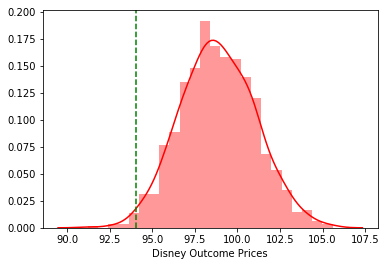

In [47]:
q = np.percentile(outcomes,1) 
sns.distplot(outcomes,color="red",vertical=False,axlabel='Disney Outcome Prices')
plt.axvline(q, color="green", linestyle="--")

with 99% confidence, we can say that the future worst stock price we may witness in Disney's case is around 94$

In [48]:
VaR_coef_disney = (starting_price - q)/starting_price
investment = 1000
VaR_disney = VaR_coef_disney*investment
print(VaR_disney)

47.008108392446495


If I invest 1000 dollars in Disney's stock, in the worst case scenario I may end up losing 47$

# Conclusion

The value at risk for Verizon's stock is the lowest, since I would lose the least amount of money if I invest in it. Thus, out of these three stocks, it would be less risky to invest in Verizon's stock. 